In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
plt.rcParams['figure.figsize'] = [10, 5]
from tqdm import tqdm

In [42]:
def do_cov_sub_plot(ax, ax_index, C_TT_order, ell_range, ell_p_range):
        
        l_min = ell_range[0]
        l_max = ell_range[1]
        lp_min = ell_p_range[0]
        lp_max = ell_p_range[1]
        C_TT_order = np.where(np.abs(C_TT_order) < 1e-12, 1e-12, np.abs(C_TT_order))

        ell_to_s_map = np.array([l * (l+1) - l - l_min**2  for l in range(l_min, l_max+1)])
        ellp_to_s_map = np.array([l * (l+1) - l - lp_min**2  for l in range(lp_min, lp_max+1)])

        axim = ax.imshow(C_TT_order.T, cmap='inferno', norm=LogNorm(), origin='lower', interpolation = 'nearest')
        
        if l_max-l_min > 20:
            jump = np.array([5, 10, 15, 20])-2
            ax.set_xticks(ell_to_s_map[jump])
            ax.set_xticklabels(np.arange(l_min, l_max+1)[jump])
        else:
            ax.set_xticks(ell_to_s_map)
            ax.set_xticklabels(np.arange(l_min, l_max+1))

        if lp_max-lp_min > 20:
            jump = np.array([5, 10, 15, 20])-2
            ax.set_yticks(ellp_to_s_map[jump])
            ax.set_yticklabels(np.arange(lp_min, lp_max+1)[jump])
        else:
            ax.set_yticks(ellp_to_s_map)
            ax.set_yticklabels(np.arange(lp_min, lp_max+1))

        ax.set_xlim([0, (l_max+1)*(l_max+2) - (l_max+1) - l_min**2 - 1])
        ax.set_ylim([0, (lp_max+1)*(lp_max+2) - (lp_max+1) - lp_min**2 - 1])
        
        ax.set_title('Difference', weight='bold', fontsize='20')
        
        if ax_index == 0 or ax_index == 2:
            ax.set_xlabel(r'$\ell$')
        if ax_index == 0 or ax_index == 2:  
            ax.set_ylabel(r"$\ell'$")
        axim.set_clim(1e-6, 1e0)

        return axim

In [58]:
#make corr matrices difference plots (the saved ones are already normalized)
L_101_7=np.load("results2/E1_Lx_1.01_Ly_1.01_Lz_1.01_beta_90_alpha_90_l_max_20_accuracy_99_percent/corr_matrix_l_2_20_lp_2_20_powlaw_mov_1.0_0.00091.npy")
L_101_9=np.load("results2/E1_Lx_1.01_Ly_1.01_Lz_1.01_beta_90_alpha_90_l_max_20_accuracy_99_percent/corr_matrix_l_2_20_lp_2_20_powlaw_mov_1.0_0.00151.npy")
diff_101=L_101_7-L_101_9

L_115_1=np.load("results2/E1_Lx_1.15_Ly_1.15_Lz_1.15_beta_90_alpha_90_l_max_20_accuracy_99_percent/corr_matrix_l_2_20_lp_2_20_powlaw_mov_1.0_0.00011.npy")
L_115_2=np.load("results2/E1_Lx_1.15_Ly_1.15_Lz_1.15_beta_90_alpha_90_l_max_20_accuracy_99_percent/corr_matrix_l_2_20_lp_2_20_powlaw_mov_1.0_0.00021.npy")
L_115_3=np.load("results2/E1_Lx_1.15_Ly_1.15_Lz_1.15_beta_90_alpha_90_l_max_20_accuracy_99_percent/corr_matrix_l_2_20_lp_2_20_powlaw_mov_1.0_0.00031.npy")
L_115_4=np.load("results2/E1_Lx_1.15_Ly_1.15_Lz_1.15_beta_90_alpha_90_l_max_20_accuracy_99_percent/corr_matrix_l_2_20_lp_2_20_powlaw_mov_1.0_0.00051.npy")
L_115_6=np.load("results2/E1_Lx_1.15_Ly_1.15_Lz_1.15_beta_90_alpha_90_l_max_20_accuracy_99_percent/corr_matrix_l_2_20_lp_2_20_powlaw_mov_1.0_0.00071.npy")
L_115_8=np.load("results2/E1_Lx_1.15_Ly_1.15_Lz_1.15_beta_90_alpha_90_l_max_20_accuracy_99_percent/corr_matrix_l_2_20_lp_2_20_powlaw_mov_1.0_0.00101.npy")
L_115_9=np.load("results2/E1_Lx_1.15_Ly_1.15_Lz_1.15_beta_90_alpha_90_l_max_20_accuracy_99_percent/corr_matrix_l_2_20_lp_2_20_powlaw_mov_1.0_0.00151.npy")
L_115_10=np.load("results2/E1_Lx_1.15_Ly_1.15_Lz_1.15_beta_90_alpha_90_l_max_20_accuracy_99_percent/corr_matrix_l_2_20_lp_2_20_powlaw_mov_1.0_0.00201.npy")
diff_115_3_4=L_115_4-L_115_3
diff_115_4_9=L_115_9-L_115_4

plot_param={
    'l_ranges': np.array([[2, 20]]),
    'lp_ranges': np.array([[2, 20]]),
}

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 14.60it/s]
/tmp/ipykernel_1011/2586566352.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


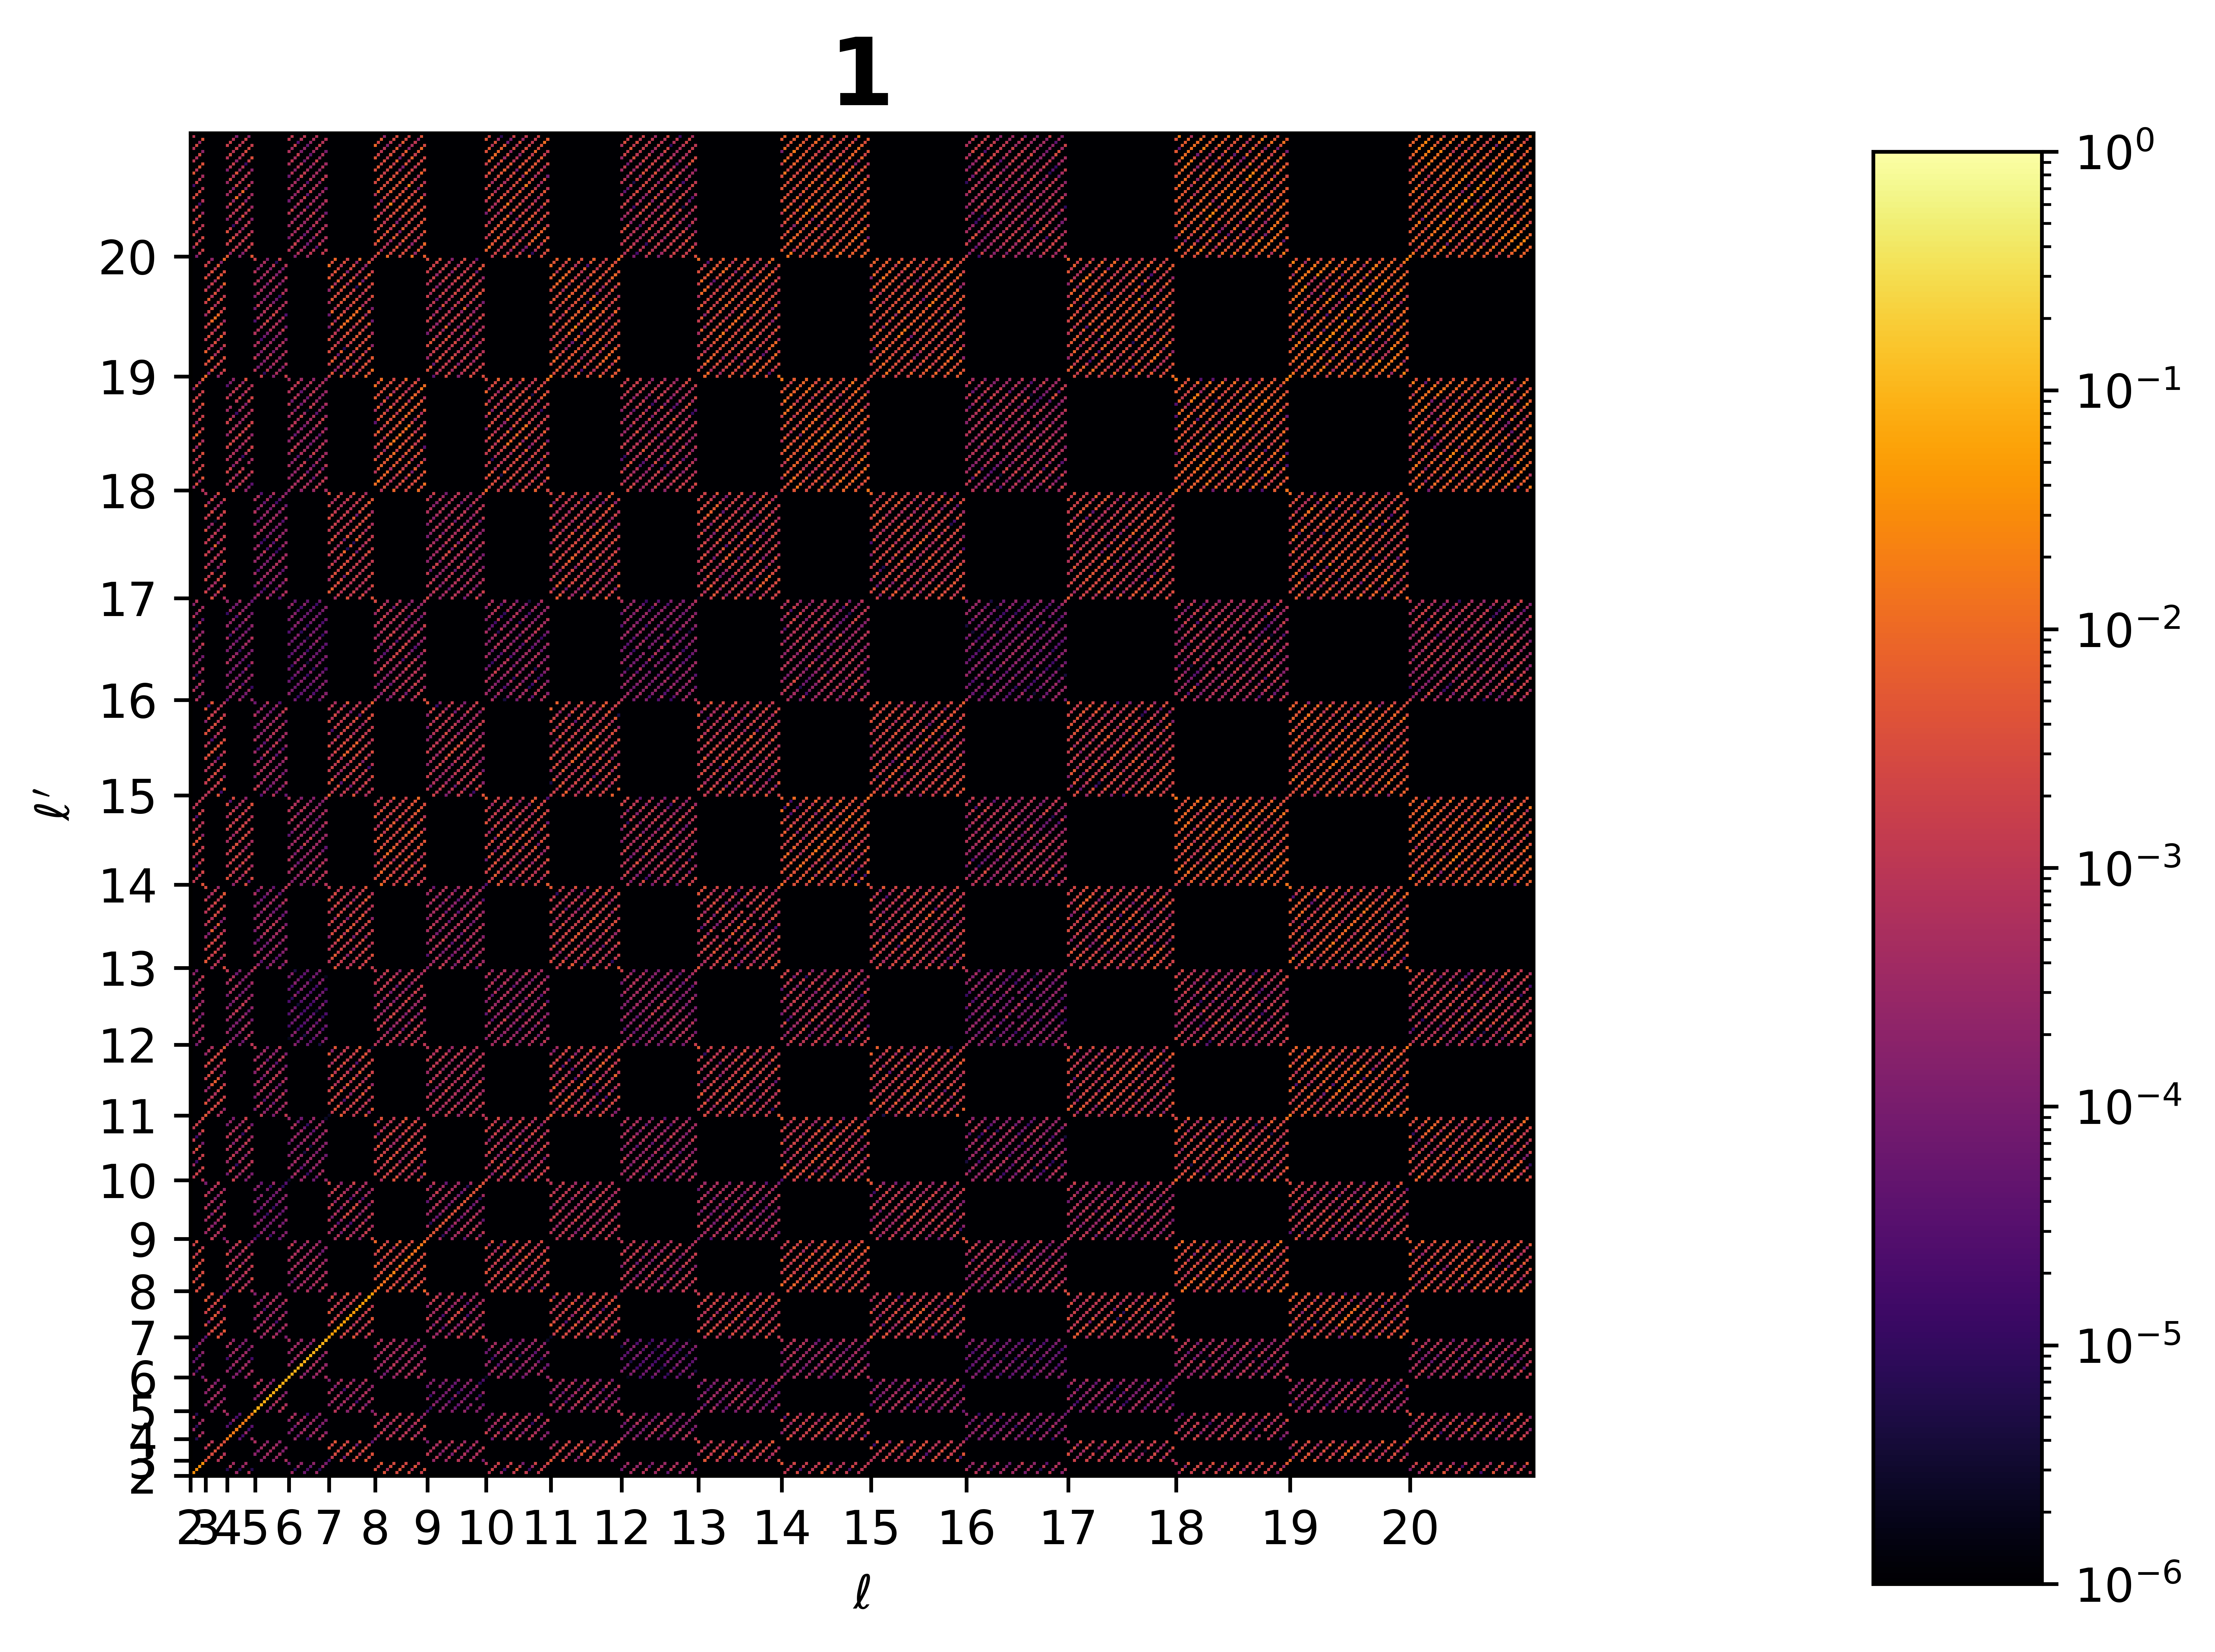

In [59]:
num_plots = plot_param['l_ranges'][:, 0].size
if num_plots == 4:
    ncols=2
    nrows=2
else:
    ncols=1
    nrows = num_plots
fig, ax = plt.subplots(ncols = ncols, nrows = nrows, dpi=500)
axs = np.array(ax)

for i, ax in enumerate(tqdm(axs.reshape(-1))):
    l_min = plot_param['l_ranges'][i, 0]
    l_max = plot_param['l_ranges'][i, 1]
    lp_min = plot_param['lp_ranges'][i, 0]
    lp_max = plot_param['lp_ranges'][i, 1]
    # Make sure the l_ranges do not overlap!
    ell_range = np.array(plot_param['l_ranges'][i, :])
    ell_p_range = np.array(plot_param['lp_ranges'][i, :])                
    im = do_cov_sub_plot(ax, i, diff_115_4_9, ell_range, ell_p_range)
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.8, 0.05, 0.05, 0.85])
fig.colorbar(im, cax=cbar_ax)
fig.subplots_adjust(hspace=.4, wspace=-0.1)
fig.tight_layout()
plt.savefig('diff_115_4_9.pdf')